### Level 1

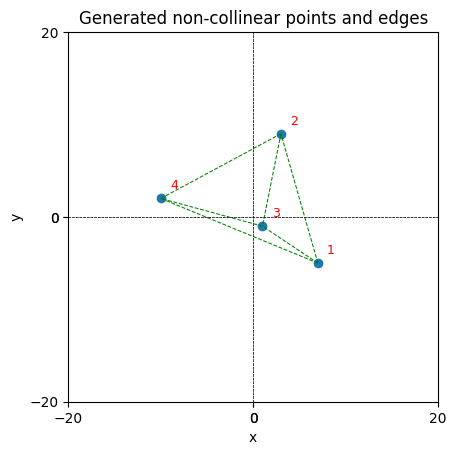

points:
x     y
7     -5
3     9
1     -1
-10   2

circular sequence
1 2 3 4 
2 1 3 4 
2 3 1 4 
2 3 4 1 
2 4 3 1 
4 2 3 1 
4 3 2 1 

crossing number: 0
crossing number (brute force): 0


In [167]:
import sys, math, random, itertools
import numpy as np
import matplotlib.pyplot as plt

def slope(p1, p2): # calculate slope between two points
  x1, y1 = p1
  x2, y2 = p2
  if x1 == x2:
    return -np.inf # vertical line
  else:
    return (y1 - y2) / (x1 - x2)

def init_points(n=4, min_coord=-10, max_coord=10):
  points = np.zeros((n, 2)) # store points
  ct = 0 # track number of points generated
  while ct < n:
    x, y = random.randint(min_coord, max_coord), random.randint(min_coord, max_coord) # randomly generate point
    new_slopes = np.array([slope((x, y), p) for p in points[:ct]]) # find slopes with existing points
    if (x, y) not in points and len(np.unique(new_slopes)) == len(new_slopes): # check if all slopes unique (otherwise, collinear triad exists)
      points[ct] = np.array([x, y]) # add point
      ct += 1
  return np.array(sorted(points, key=lambda p: p[0], reverse=True))

def generate_slopes(points):
  n = len(points)
  slopes = np.zeros((n, n))
  for i in range(n):
    for j in range(i, n):
      s = slope(points[i], points[j])
      slopes[i][j], slopes[j][i] = s, s
  return slopes

def generate_swap_seq(points, slopes):
  n = len(points)
  initial = [ind[0] + 1 for ind in sorted(enumerate(points), key=lambda p: p[1][0], reverse=True)] # begin facing south 
  swaps = sorted([(min(i + 1, j + 1), max(i + 1, j + 1)) for i in range(n) for j in range(i)], key=lambda s: slopes[s[0] - 1][s[1] - 1]) # sort slopes to get swapping order
  return swaps

def generate_circular_sequence(n, swaps):
  edg = np.zeros(n - 1) # store number of j-edges
  circ = np.zeros((n * (n - 1) // 2 + 1, n)) # store circular sequence
  seq = [i for i in range(1, n + 1)]
  circ[0] = seq
  for ind, slope in enumerate(swaps): # iterate through swaps
    i, j = slope
    tmpsq = seq.copy() # swap positions
    edg[min(seq.index(i), seq.index(j))] += 1
    tmpsq[seq.index(i)], tmpsq[seq.index(j)] = j, i
    circ[ind + 1] = tmpsq
    seq = tmpsq
  return circ, edg

def calculate_cr(n, edg):
  return int(sum([edg[j] * ((n - 2) * (n - 3) / 4 - j * (n - j - 2)) for j in range(n - 1)]))

def print_points(points, min_coord, max_coord):
  print("points:")
  pad = 2 * max(len(str(int(min_coord))), len(str(int(max_coord))))
  print("x".ljust(pad) + "y")
  for p in points:
    x, y = p
    print(f"{int(x)}".ljust(pad) + f"{int(y)}")

def print_circular_sequence(n, circ):
  print("circular sequence")
  pad = 2 * len(str(n))
  for c in circ:
    print("".join([f"{int(i)}".ljust(pad) for i in c]))

def brute_force_circular_sequence(points):
  # https://math.stackexchange.com/questions/3176543/intersection-point-of-2-lines-defined-by-2-points-each

  n = len(points)

  cross = 0

  edg = itertools.combinations(np.arange(0, n, 1), 2)
  for pair in itertools.combinations(edg, 2):
    e1, e2 = pair
    if e1[0] not in e2 and e1[1] not in e2:
      n = (points[e1[1]][0] - points[e1[0]][0], points[e1[1]][1] - points[e1[0]][1])
      m = (points[e2[0]][0] - points[e2[1]][0], points[e2[0]][1] - points[e2[1]][1])
      p = (points[e2[0]][0] - points[e1[0]][0], points[e2[0]][1] - points[e1[0]][1])

      D = n[0] * m[1] - n[1] * m[0]
      if D != 0:
        Q = (m[1] * p[0] - m[0] * p[1], n[0] * p[1] - n[1] * p[0])

        t, s = Q[0] / D, Q[1] / D
        if 0 < t < 1 and 0 < s < 1:
          cross += 1

  return cross

n = 4
min_coord = -10
max_coord = 10
step = 20
ext = 10

points = init_points(n, min_coord, max_coord)
slopes = generate_slopes(points)
swaps = generate_swap_seq(points, slopes)
circ, edg = generate_circular_sequence(n, swaps)
cr = calculate_cr(n, edg)
cr_bruteforce = brute_force_circular_sequence(points)

plt.scatter(points[:,0], points[:,1]) # plot points
for ind, p in enumerate(points): # plot labels
  plt.text(p[0] + 1, p[1] + 1, f"{ind+1}", color='red', fontsize=9)
for edg in itertools.combinations(points, 2): # plot edges
  x1, y1 = edg[0]
  x2, y2 = edg[1]
  plt.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=0.75)

# visuals
plt.xlim(min_coord - ext, max_coord + ext)
plt.ylim(min_coord - ext, max_coord + ext)
ticks = np.concatenate((np.arange(0, min_coord - step - 1, -step), np.arange(0, max_coord + step + 1, step)))
plt.xticks(ticks)
plt.yticks(ticks)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.gca().set_aspect('equal') 
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.title('Generated non-collinear points and edges')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print_points(points, min_coord, max_coord)
print("")
print_circular_sequence(n, circ)
print("")
print("crossing number:", cr)
print("crossing number (brute force):", cr_bruteforce)

### Level 2

In [ ]:
import scipy as sp
import math

def slope_compare(e1, e2):
  p11, p12 = e1
  p21, p22 = e2

  m1 = slope(p11, p12)
  m2 = slope(p21, p22)
  
  if m1 > m2:
    return -1
  if m1 == m2:
    return 0
  if m1 < m2:
    return 1
  

def init_circular_sequence(n):
  points = init_points(n, -2 * n, 2 * n) # to guarantee circular sequence is viable, generate from set of points
  slopes = generate_slopes(points)
  swaps = generate_swap_seq(points, slopes)
  circ, edg = generate_circular_sequence(n, swaps)
  return points, circ, swaps

def generate_points(n, swaps_match):
  points = np.zeros((n, 2)) # store points
  ix = [math.cos(2 * np.pi / n * i) for i in range(n)]
  iy = [math.sin(2 * np.pi / n * i) for i in range(n)]
  points[:,0] = ix
  points[:,1] = iy
  points = np.array(sorted(points, key=lambda p: p[0], reverse=True))

  points = points * 8

  cons = [{'type': 'ineq', 'fun': lambda x: slope_compare(((x[swaps[i][0] - 1] * ix[swaps[i][0] - 1], x[swaps[i][0] - 1] * iy[swaps[i][0] - 1]), (x[swaps[i][1] - 1] * ix[swaps[i][1] - 1], x[swaps[i][1] - 1] * iy[swaps[i][1] - 1])), ((x[swaps[i + 1][0] - 1] * ix[swaps[i + 1][0] - 1], x[swaps[i + 1][0] - 1] * iy[swaps[i + 1][0] - 1]), (x[swaps[i + 1][1] - 1] * ix[swaps[i + 1][1] - 1], x[swaps[i + 1][1] - 1] * iy[swaps[i + 1][1] - 1])))} for i in range(n - 1)]

  res = sp.optimize.minimize(lambda x: sum(x), [8 for _ in range(n)], method='SLSQP', bounds=[(1, None) for _ in range(n)], constraints=cons)
  print(res)

  return points

n = 4
t_points, circ, swaps = init_circular_sequence(n)
print_circular_sequence(n, circ)
points = generate_points(n, swaps)
min_coord = -10
max_coord = 10
step = 4
ext = 2

plt.scatter(points[:,0], points[:,1]) # plot points
plt.scatter(t_points[:,0], t_points[:,1], color="magenta") # plot points
for ind, p in enumerate(points): # plot labels
  plt.text(p[0] + 0.5, p[1] + 0.5, f"{ind+1}", color='red', fontsize=9)
for e in itertools.combinations(points, 2): # plot edges
  x1, y1 = e[0]
  x2, y2 = e[1]
  plt.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=0.75)

# visuals
plt.ylim(min_coord - ext, max_coord + ext)
plt.xlim(min_coord - ext, max_coord + ext)
ticks = np.concatenate((np.arange(0, min_coord - ext, -step), np.arange(0, max_coord + ext, step)))
plt.yticks(ticks)
plt.xticks(ticks)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--') 
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.title('Generated non-collinear points and edges')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print_points(points, min_coord, max_coord)

slopes = generate_slopes(points)
swaps = generate_swap_seq(points, slopes)
circ_ver, edg = generate_circular_sequence(n, swaps)
print("")
print("# verify circular sequence")
print_circular_sequence(n, circ_ver)
print("circular sequence matches target with", len(circ) - np.sum((circ == circ_ver).all(1)), "errors")

circular sequence
1 2 3 4 
2 1 3 4 
2 1 4 3 
2 4 1 3 
2 4 3 1 
4 2 3 1 
4 3 2 1 


TypeError: slope_compare() missing 1 required positional argument: 'e2'